<a href="https://colab.research.google.com/github/malmusfer/Enron-fraud/blob/master/Enron_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](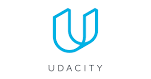 "Udacity") ![alt text](https://www.miskacademy.edu.sa/app/themes/misk-academy/images/logos.png "Misk") 


# Mini-Project: Analyze Data : Enron Fraud Data
## by: Almutairi, Muhanned
![alt text](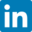 "LinkedIn profile")   [LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering data](#Gathering)
- [Part II - Datasets and Questions](#A1)
- [Part III - Regression ](#A2)


<a id='intro'></a>
### Introduction


The Enron fraud is a big, messy and totally fascinating story about corporate malfeasance of nearly every imaginable type. The Enron email and financial datasets are also big, messy treasure troves of information, which become much more useful once we know our way around them a bit. Udacity had combined the email and finance data into a single dataset, which we will explore in this mini-project.

<a id='Gathering'></a>
### Part I - Gathering data

In [1]:
!git clone https://github.com/udacity/ud120-projects

fatal: destination path 'ud120-projects' already exists and is not an empty directory.


In [41]:
import pickle
import pandas as pd
with open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") as data_file:
  data_dict  = pickle.load(data_file)
  enron_data = pd.DataFrame.from_dict(data_dict, orient = 'index')

In [3]:
enron_data.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


<a id='A1'></a>
### Part II - Datasets and Questions

In [ ]:
print("There are a total of {} people in the dataset." .format(len(enron_data.index)))

There are a total of 146 people in the dataset.


In [ ]:
print("Out of which {} are POI and {} Non-POI." .format(enron_data['poi'].value_counts()[True], 
                                                 enron_data['poi'].value_counts()[False]))

Out of which 18 are POI and 128 Non-POI.


In [ ]:
print("Total number of email plus financial features are {}. 'poi' column is our label.".format(len(enron_data.columns)-1))

Total number of email plus financial features are 20. 'poi' column is our label.


-What is the total value of the stock belonging to James Prentice? 

In [ ]:
 print("What is the total value of the stock belonging to James Prentice?   : {}".format(enron_data['total_stock_value']['PRENTICE JAMES']))

What is the total value of the stock belonging to James Prentice?   : 1095040


-How many email messages do we have from Wesley Colwell to persons of interest?

In [ ]:
 print("How many email messages do we have from Wesley Colwell to persons of interest?   : {}".format(enron_data['from_this_person_to_poi']['COLWELL WESLEY']))

How many email messages do we have from Wesley Colwell to persons of interest?   : 11


-What’s the value of stock options exercised by Jeffrey K Skilling? 

In [ ]:
 print("What’s the value of stock options exercised by Jeffrey K Skilling?   : {}".format(enron_data['exercised_stock_options']['SKILLING JEFFREY K']))

What’s the value of stock options exercised by Jeffrey K Skilling?   : 19250000


-Of these three individuals (Lay, Skilling and Fastow), who took home the most money?

In [1]:
print("Of these three individuals (Lay, Skilling and Fastow), who took home the most money? Mr. Skilling : {}, Mr. Lay : {}, Mr. Fastow : {} ".format(enron_data['total_payments']['SKILLING JEFFREY K'], enron_data['total_payments']['LAY KENNETH L'] , enron_data['total_payments']['FASTOW ANDREW S']))

NameError: ignored

In [ ]:
enron_data.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,95,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,51,60,44,60,53,60,128,80,60,36,129


-How many folks in this dataset have a quantified salary? What about a known email address?



In [ ]:
print( "How many folks in this dataset have a quantified salary? : {} What about a known email address? : {}".format(95, (enron_data.shape[0]) - ((enron_data.email_address == 'NaN').sum())))

How many folks in this dataset have a quantified salary? : 95 What about a known email address? : 111


-How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments? What percentage of people in the dataset as a whole is this?

In [ ]:
print('How many people in the dataset have “NaN” for their total payments? : {} , What percentage : {} '.format(sum(enron_data.total_payments.loc[:]=='NaN'), 100*(sum(enron_data.total_payments.loc[:]=='NaN')/enron_data.shape[0])))

How many people in the dataset have “NaN” for their total payments? : 21 , What percentage : 14.383561643835616 


-How many POIs in the E+F dataset have “NaN” for their total payments? What percentage of POI’s as a whole is this?



In [ ]:
import numpy as np
nan = np.nan

In [ ]:
print('How many POIs in the dataset have “NaN” for their total payments? : {}  '.format(len(enron_data.query("(poi == True) and (total_payments == @nan)"))))

How many POIs in the dataset have “NaN” for their total payments? : 0  


-What is the new number of people of the dataset? What is the new number of folks with “NaN” for total payments?

If you added in, say, 10 more data points which were all POI’s, and put “NaN” for the total payments for those folks, the numbers you just calculated would change.

In [ ]:
print('what is number of people : {} , What is number of folks : {} '.format((enron_data.shape[0] + 10), sum(enron_data.total_payments.loc[:]=='NaN')+10))

what is number of people : 156 , What is number of folks : 31 


-What is the new number of POI’s in the dataset? What is the new number of POI’s with NaN for total_payments?

In [ ]:
print('what is number of POI : {} , What is number of POIs with NaN : {} '.format((enron_data['poi'].value_counts()[True] + 10), len(enron_data.query("(poi == True) and (total_payments == @nan)"))+10))

what is number of POI : 28 , What is number of POIs with NaN : 10 


<a id='A2'></a>
### Part III - Regression

In [51]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [52]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [9]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [54]:
dictionary = pickle.load( open("/content/ud120-projects/final_project/final_project_dataset_modified.pkl", "rb") )
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_test,target_test)

print('slope:', reg.coef_)
print('intercept:', reg.intercept_)
print("\n ####### stats on test dataset ####### \n" )
print('Score:', reg.score(feature_test,target_test))
print("\n ####### stats on train dataset ####### \n" )
print('Score:', reg.score(feature_train,target_train))

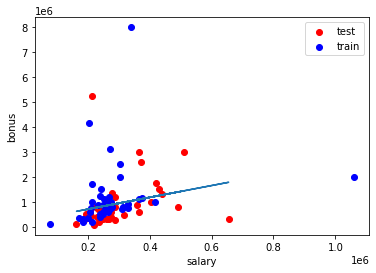

In [58]:
train_color = "b"
test_color = "r"
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Perform the regression of bonus against long term incentive--what’s the score on the test data?

In [62]:
dictionary = pickle.load( open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") )
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_test,target_test)

print('slope:', reg.coef_)
print('intercept:', reg.intercept_)
print("\n ####### stats on test dataset ####### \n" )
print('Score:', reg.score(feature_test,target_test))
print("\n ####### stats on train dataset ####### \n" )
print('Score:', reg.score(feature_train,target_train))

slope: [2.00627433]
intercept: -110446.09752969071

 ####### stats on test dataset ####### 

Score: 0.995531701834322

 ####### stats on train dataset ####### 

Score: -0.11748081780876585
